# Project Review

## Main goal of the project

This project is about predicting whether a customer will change telecommunications provider, something known as "churning".

## File descriptions

- train.csv - the training set.
<br>Contains 4250 lines with 20 columns. 3652 samples (85.93%) belong to class churn=no and 598 samples (14.07%) belong to class churn=yes

- test.csv - the test set.
<br>Contains 750 lines with 20 columns: the index of each sample and the 19 features (missing the target variable "churn").

## Data fields (features)

- state, string. 2-letter code of the US state of customer residence
- account_length, numerical. Number of months the customer has been with the current telco provider
- area_code, string="area_code_AAA" where AAA = 3 digit area code.
- international_plan, (yes/no). The customer has international plan.
- voice_mail_plan, (yes/no). The customer has voice mail plan.
- number_vmail_messages, numerical. Number of voice-mail messages.
- total_day_minutes, numerical. Total minutes of day calls.
- total_day_calls, numerical. Total number of day calls.
- total_day_charge, numerical. Total charge of day calls.
- total_eve_minutes, numerical. Total minutes of evening calls.
- total_eve_calls, numerical. Total number of evening calls.
- total_eve_charge, numerical. Total charge of evening calls.
- total_night_minutes, numerical. Total minutes of night calls.
- total_night_calls, numerical. Total number of night calls.
- total_night_charge, numerical. Total charge of night calls.
- total_intl_minutes, numerical. Total minutes of international calls.
- total_intl_calls, numerical. Total number of international calls.
- total_intl_charge, numerical. Total charge of international calls
- number_customer_service_calls, numerical. Number of calls to customer service
- churn, (yes/no). Customer churn - target variable.

# Work with the data

### Initial imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(59)
# set the max columns to none
pd.set_option('display.max_columns', None)

## EDA

In [3]:
train_path = 'data\\train.csv'
df = pd.read_csv(train_path)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
print('Size of train', df.shape)

Size of train (4250, 20)


In [5]:
print('Target distribution:')
print(df.churn.value_counts(normalize=True))

Target distribution:
no     0.859294
yes    0.140706
Name: churn, dtype: float64


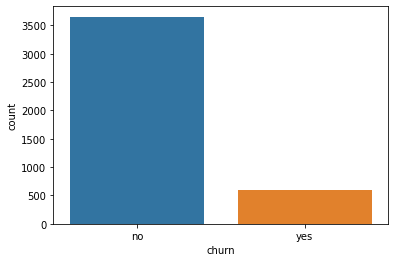

In [6]:
sns.countplot(x='churn', data=df)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [8]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Check missing values

In [9]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [10]:
df.state.value_counts()

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

In [11]:
df.state.unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [12]:
len(df.state.unique())

51

<AxesSubplot:xlabel='state', ylabel='count'>

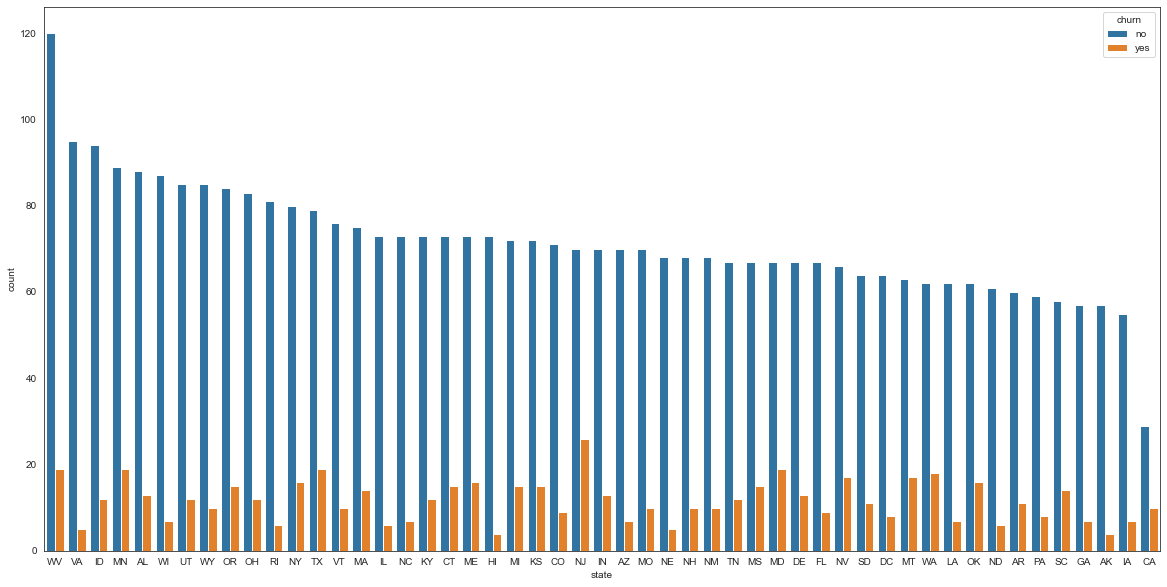

In [13]:
sns.set_style('white')
plt.figure(figsize=(20, 10))

sns.countplot(x='state', hue='churn', data=df,
              order=df[df['churn'] == 'no']['state'].value_counts().index)

It is more important to keep states where there are the biggest churn, that's why it makes sense to sort by churn

<AxesSubplot:xlabel='state', ylabel='count'>

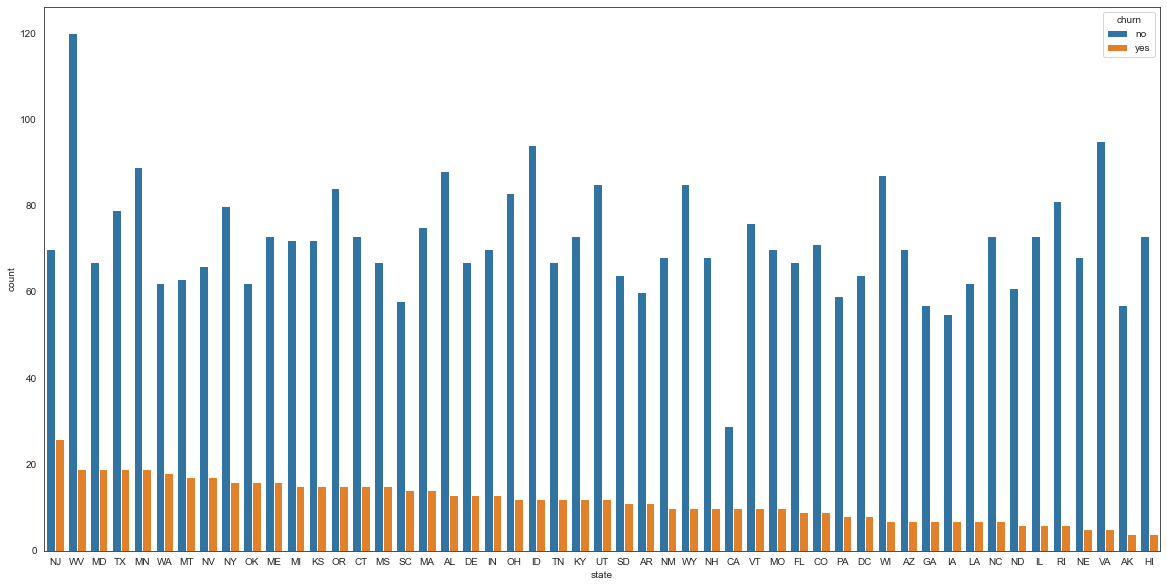

In [14]:
sns.set_style('white')
plt.figure(figsize=(20, 10))

sns.countplot(x='state', hue='churn', data=df,
              order=df[df['churn'] == 'yes']['state'].value_counts().index)

In encoding we will keep top 5 and other will be labeled as ```Other```

<AxesSubplot:xlabel='area_code', ylabel='count'>

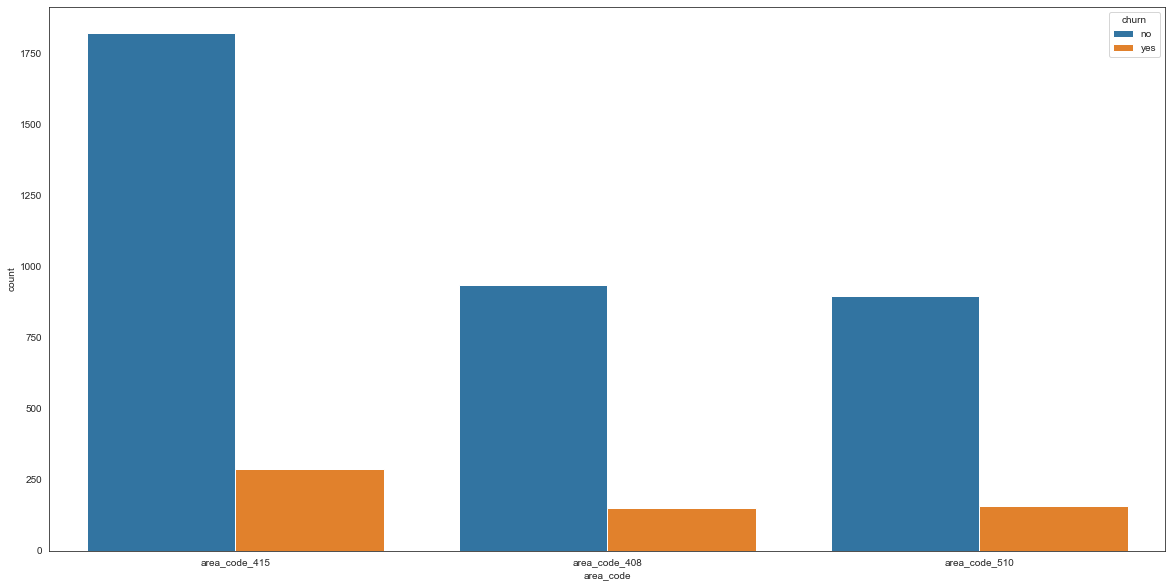

In [15]:
sns.set_style('white')
plt.figure(figsize=(20, 10))

sns.countplot(x='area_code', hue='churn', data=df)

In [16]:
df.area_code.value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [17]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

### Data preprocessing

1. Convert string values to the numerical values in binary columns

2. To reduce the number of features, it is logical to calculate total daily features of charge, calls and minutes

3. Convert categorical features ```state``` and ```area_code```:

    - ```state``` will be converted using only top 5 churn states
    - ```area_code``` has small length and will be converted fully
    - Both features will be converted using One Hot Encoding

In [18]:
def data_preprocessing(df):
    bin_columns = ['international_plan', 'voice_mail_plan', 'churn']
    for col in bin_columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})
        
    feature_types = ['minutes', 'calls', 'charge']

    for feature in feature_types:
        df['total_' + feature] = df['total_day_' + feature] + df['total_eve_' + feature] + df['total_night_' + feature]
        df.drop(['total_day_' + feature, 'total_eve_' + feature, 'total_night_' + feature], axis=1, inplace=True)
        
    top5_states = df[df['churn'] == 1]['state']\
                    .value_counts()\
                    .sort_values(ascending=False)[:5]\
                    .index.values
                    
    df['state'] = df['state'].apply(lambda x: x if x in top5_states else 'other')
    df = pd.get_dummies(df, columns=['area_code', 'state'])
    
    return df

In [19]:
df = data_preprocessing(df)

In [20]:
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,state_MD,state_MN,state_NJ,state_TX,state_WV,state_other
0,107,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54,0,1,0,0,0,0,0,0,1
1,137,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00,0,1,0,0,0,1,0,0,0
2,84,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02,1,0,0,0,0,0,0,0,1
3,75,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36,0,1,0,0,0,0,0,0,1
4,121,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28,0,0,1,0,0,0,0,0,1


In [21]:
test_path = 'data\\test.csv'
df_test = pd.read_csv(test_path)

df_test['churn'] = 'no'
df_test = data_preprocessing(df_test)
df_test.head()

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,state_other
0,1,128,0,1,25,10.0,3,2.70,1,0,707.2,300,72.86,0,1,0,1
1,2,118,1,0,0,6.3,6,1.70,0,0,647.9,317,65.91,0,0,1,1
2,3,62,0,0,0,13.1,6,3.54,4,0,630.9,245,55.77,0,1,0,1
3,4,93,0,0,0,8.1,3,2.19,3,0,538.5,346,56.80,0,0,1,1
4,5,174,0,0,0,15.5,5,4.19,3,0,652.1,303,55.96,0,1,0,1


Save preprocessed data

In [22]:
path = 'preprocessed_data\\'
train_name = 'train.csv'
test_name = 'test.csv'

df.to_csv(path + train_name, index=False)
df_test.to_csv(path + test_name, index=False)